In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import fastf1
import fastf1.plotting

In [3]:
bahrain_race = fastf1.get_session(2023, 1, "R")
bahrain_race.load(telemetry=True, laps=True, weather=True)

saudi_race = fastf1.get_session(2023, 2, "R")
saudi_race.load(telemetry=True, laps=True, weather=True)

australia_race = fastf1.get_session(2023, 3, "R")
australia_race.load(telemetry=True, laps=True, weather=True)

azerbaijan_race = fastf1.get_session(2023, 4, "R")
azerbaijan_race.load(telemetry=True, laps=True, weather=True)

miami_race = fastf1.get_session(2023, 5, "R")
miami_race.load(telemetry=True, laps=True, weather=True)

monaco_race = fastf1.get_session(2023, 6, "R")
monaco_race.load(telemetry=True, laps=True, weather=True)

spain_race = fastf1.get_session(2023, 7, "R")
spain_race.load(telemetry=True, laps=True, weather=True)

canada_race = fastf1.get_session(2023, 8, "R")
canada_race.load(telemetry=True, laps=True, weather=True)

austria_race = fastf1.get_session(2023, 9, "R")
austria_race.load(telemetry=True, laps=True, weather=True)

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\gakro\AppData\Local\Temp\fastf1.
	Size: 1.41 GB
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core  

In [22]:
drivers = ["ALB", "ALO", 
            "BOT", "DEV", 
            "GAS", "HAM", 
            "HUL", "LEC", 
            "MAG", "NOR", 
            "OCO", "PER", 
            "PIA", "RUS", 
            "SAI", "SAR", 
            "STR", "TSU", 
            "VER", "ZHO"]

compounds = {"SOFT": 'red', 
             "MEDIUM": 'yellow', 
             "HARD": 'white',
             "INTERMEDIATE": "lime",
             "WET": "blue"}

sessions = [bahrain_race, saudi_race, australia_race, azerbaijan_race, miami_race, monaco_race, spain_race, canada_race, austria_race]
session_name = "Race"

In [16]:
def tyre_strategy_visualization(session, session_name, drivers, compounds):    
    sample = session.laps.pick_driver("VER").filter(['LapNumber','Stint','Compound', 'TyreLife'], axis=1)

    stint_prev = 1.0
    lap_prev = 1.0
    compound_prev = ""
    stint_length = 0.0
    stint_df = pd.DataFrame(columns=["stint", "stint length", "compound"])
    for index, row in sample.iterrows():
        if stint_prev != row["Stint"]:
            stint_length = row["LapNumber"] - lap_prev
            lap_prev = row["LapNumber"]
            stint_df.loc[len(stint_df)] = {"stint": stint_prev, "stint length": stint_length, "compound": compound_prev}
            stint_prev = row["Stint"]


        elif len(sample) == row["LapNumber"]:
            stint_length = row["LapNumber"] - lap_prev + 1
            lap_prev = row["LapNumber"]
            stint_df.loc[len(stint_df)] = {"stint": stint_prev, "stint length": stint_length, "compound": compound_prev}
            stint_prev = row["Stint"]

        else:
            compound_prev = row["Compound"]

    tyre_strategy = np.empty(len(drivers), object)
    for i in range(len(drivers)):
        session.laps.pick_driver(drivers[i]).columns
        sample = session.laps.pick_driver(drivers[i]).filter(['LapNumber','Stint','Compound', 'TyreLife'], axis=1)

        stint_prev = 1.0
        lap_prev = 1.0
        compound_prev = ""
        stint_length = 0.0
        stint_df = pd.DataFrame(columns=["stint", "stint length", "compound"])
        for index, row in sample.iterrows():
            if stint_prev != row["Stint"]:
                stint_length = row["LapNumber"] - lap_prev
                lap_prev = row["LapNumber"]
                stint_df.loc[len(stint_df)] = {"stint": stint_prev, "stint length": stint_length, "compound": compound_prev}
                stint_prev = row["Stint"]


            elif len(sample) == row["LapNumber"]:
                stint_length = row["LapNumber"] - lap_prev + 1
                lap_prev = row["LapNumber"]
                stint_df.loc[len(stint_df)] = {"stint": stint_prev, "stint length": stint_length, "compound": compound_prev}
                stint_prev = row["Stint"]

            else:
                compound_prev = row["Compound"]

        tyre_strategy[i] = stint_df

    fig, ax = plt.subplots()
    for h in range(len(drivers)):
        x = [drivers[h]]
        y = None
        y_prev = None
        y_total = 0
        color = None

        for i in range(len(tyre_strategy[h]["stint length"])):
            y = tyre_strategy[h]["stint length"].iloc[i]
            compound = tyre_strategy[h]["compound"].iloc[i]
            color = compounds[compound]

            if y_prev == None:
                ax.barh(x, y, color=color, edgecolor = "black", linewidth = 2)
                y_prev = y
            else:
                ax.barh(x, y, left=y_prev, color = color, edgecolor = "black", linewidth = 2)
                y_prev = y + y_prev

            y_total = y_total + y

        ax.set_facecolor("black")
        ax.legend()
        fig.set_dpi(1000)
        ax.set_facecolor("black")
    ax.invert_yaxis()
    #plt.show()

    #ax.legend()
    plt.suptitle(f"Tyre Strategy Comparison \n "f"{session.event['EventName']} {session.event.year} {session_name}")
    plt.figure().set_size_inches(50000, 500000, forward=True)
    #fig.set_dpi(1000)
    #ax.set_facecolor("black")
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

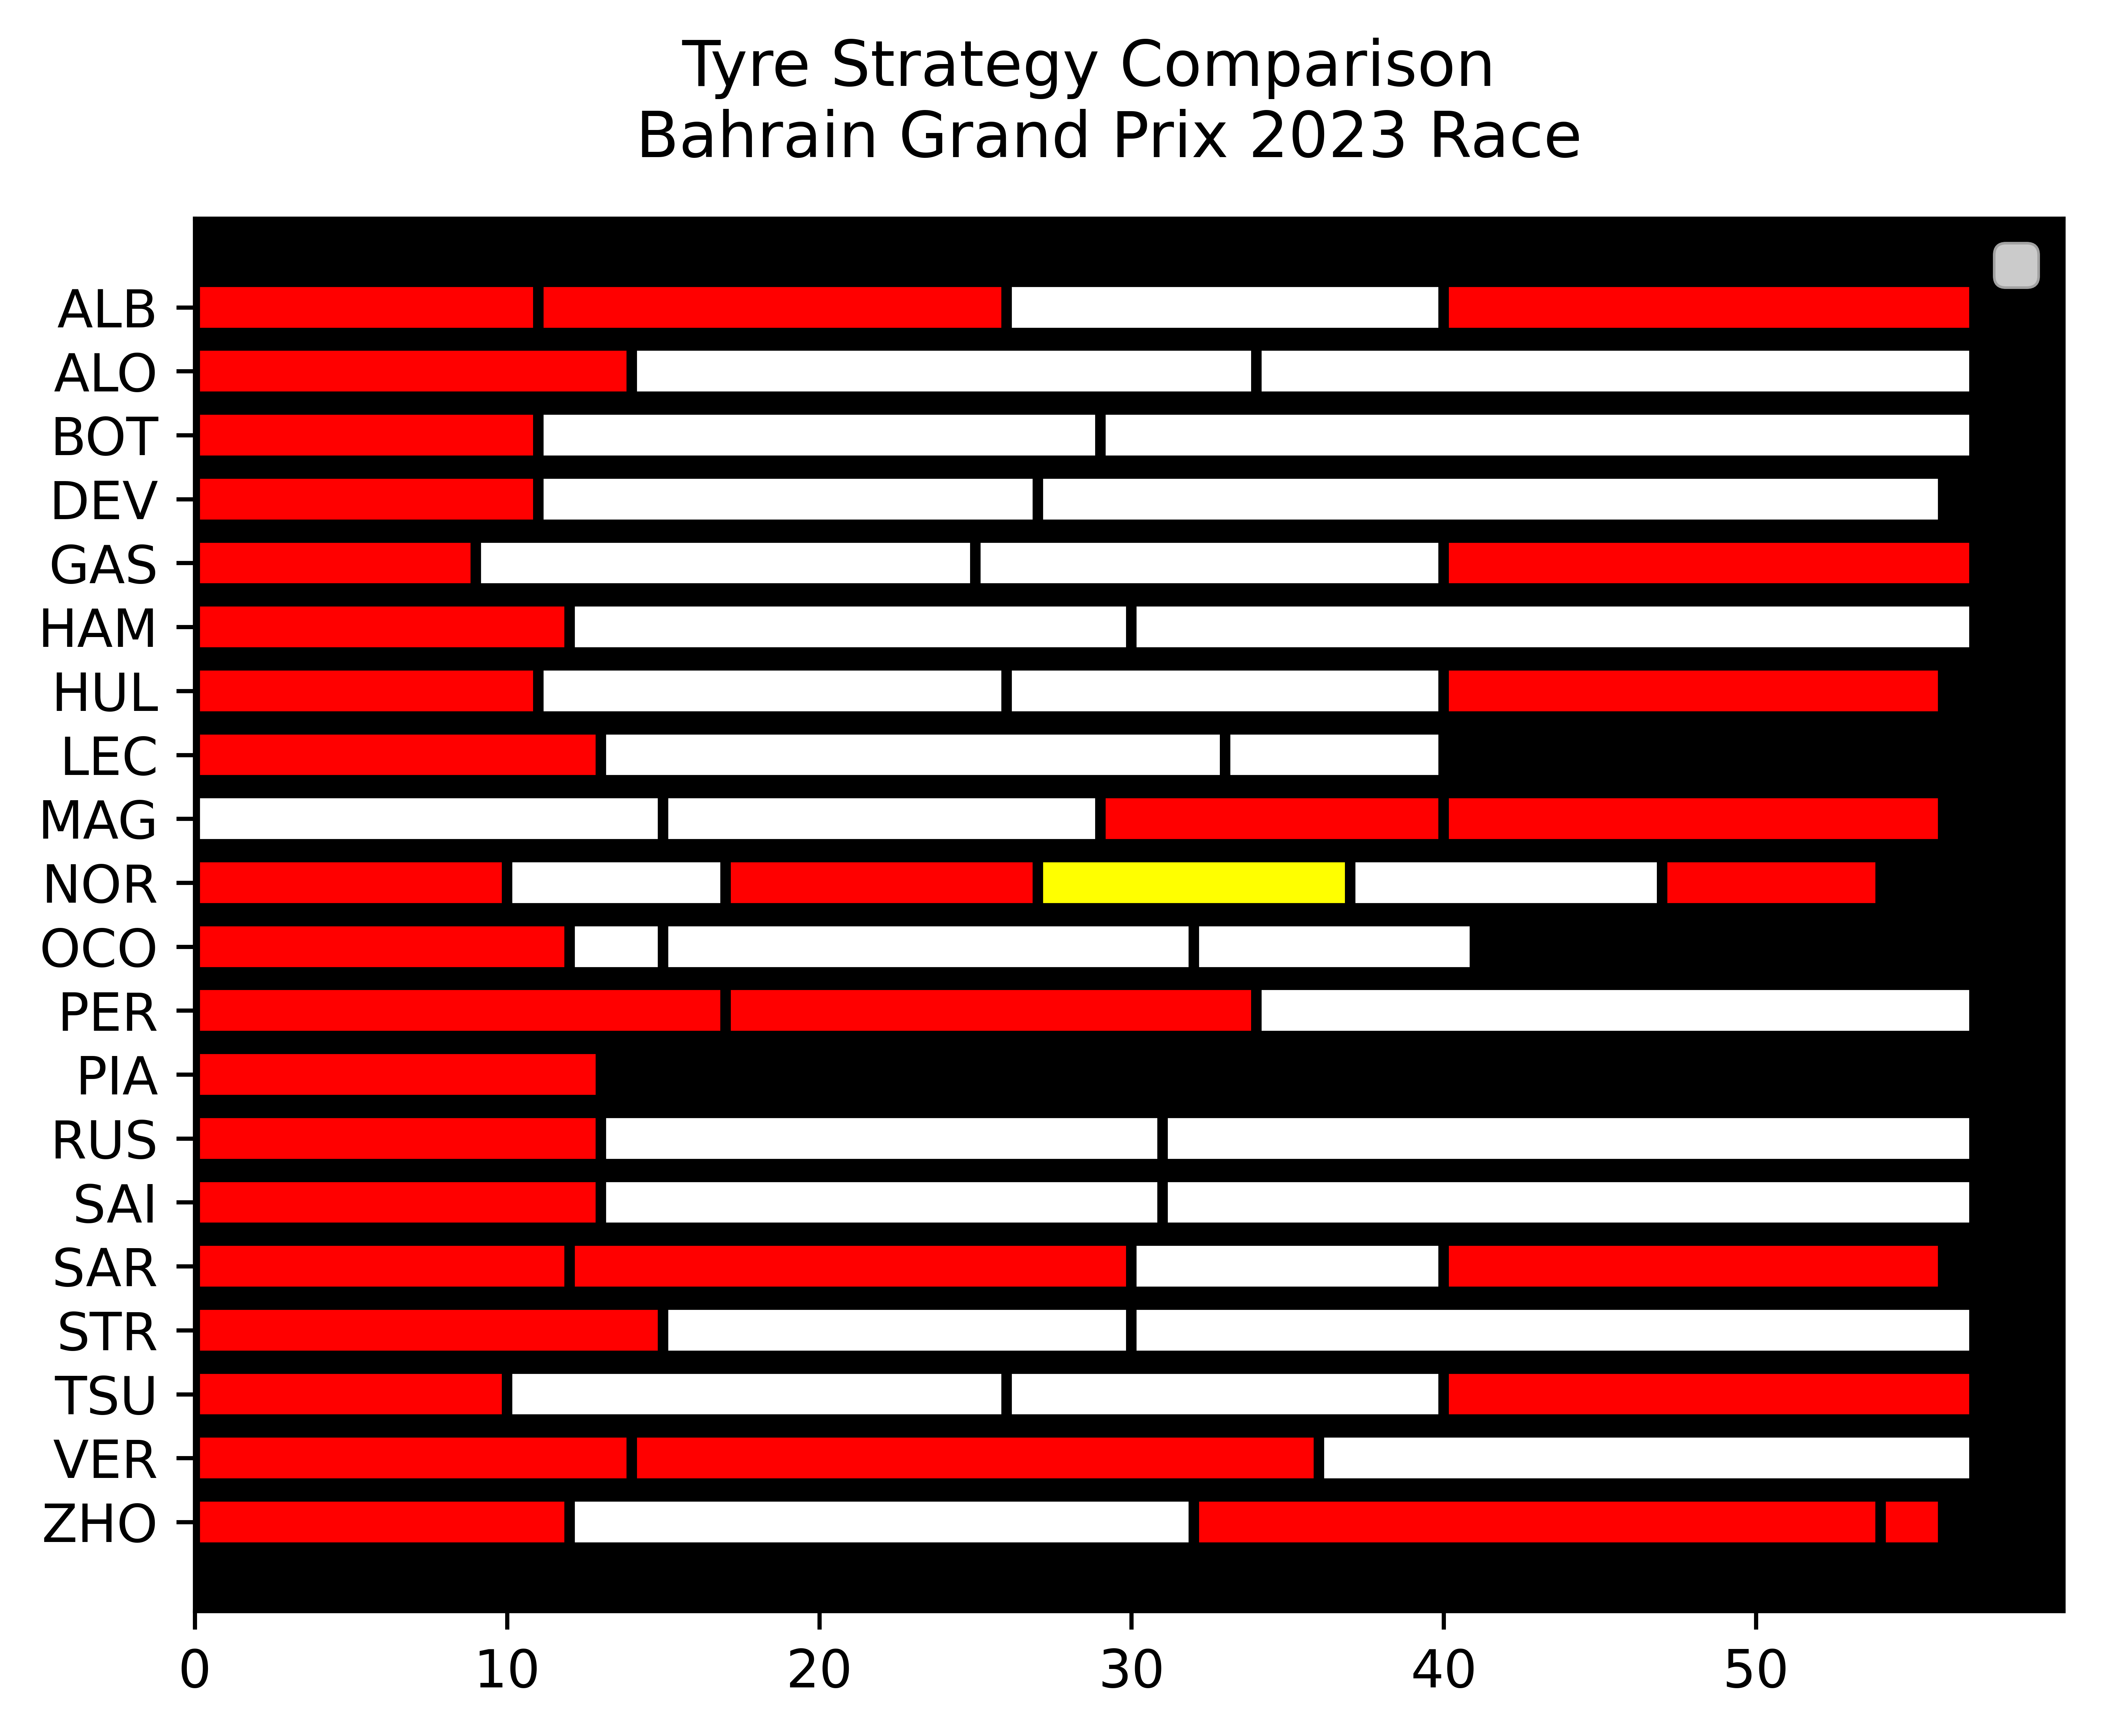

<Figure size 5e+06x5e+07 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

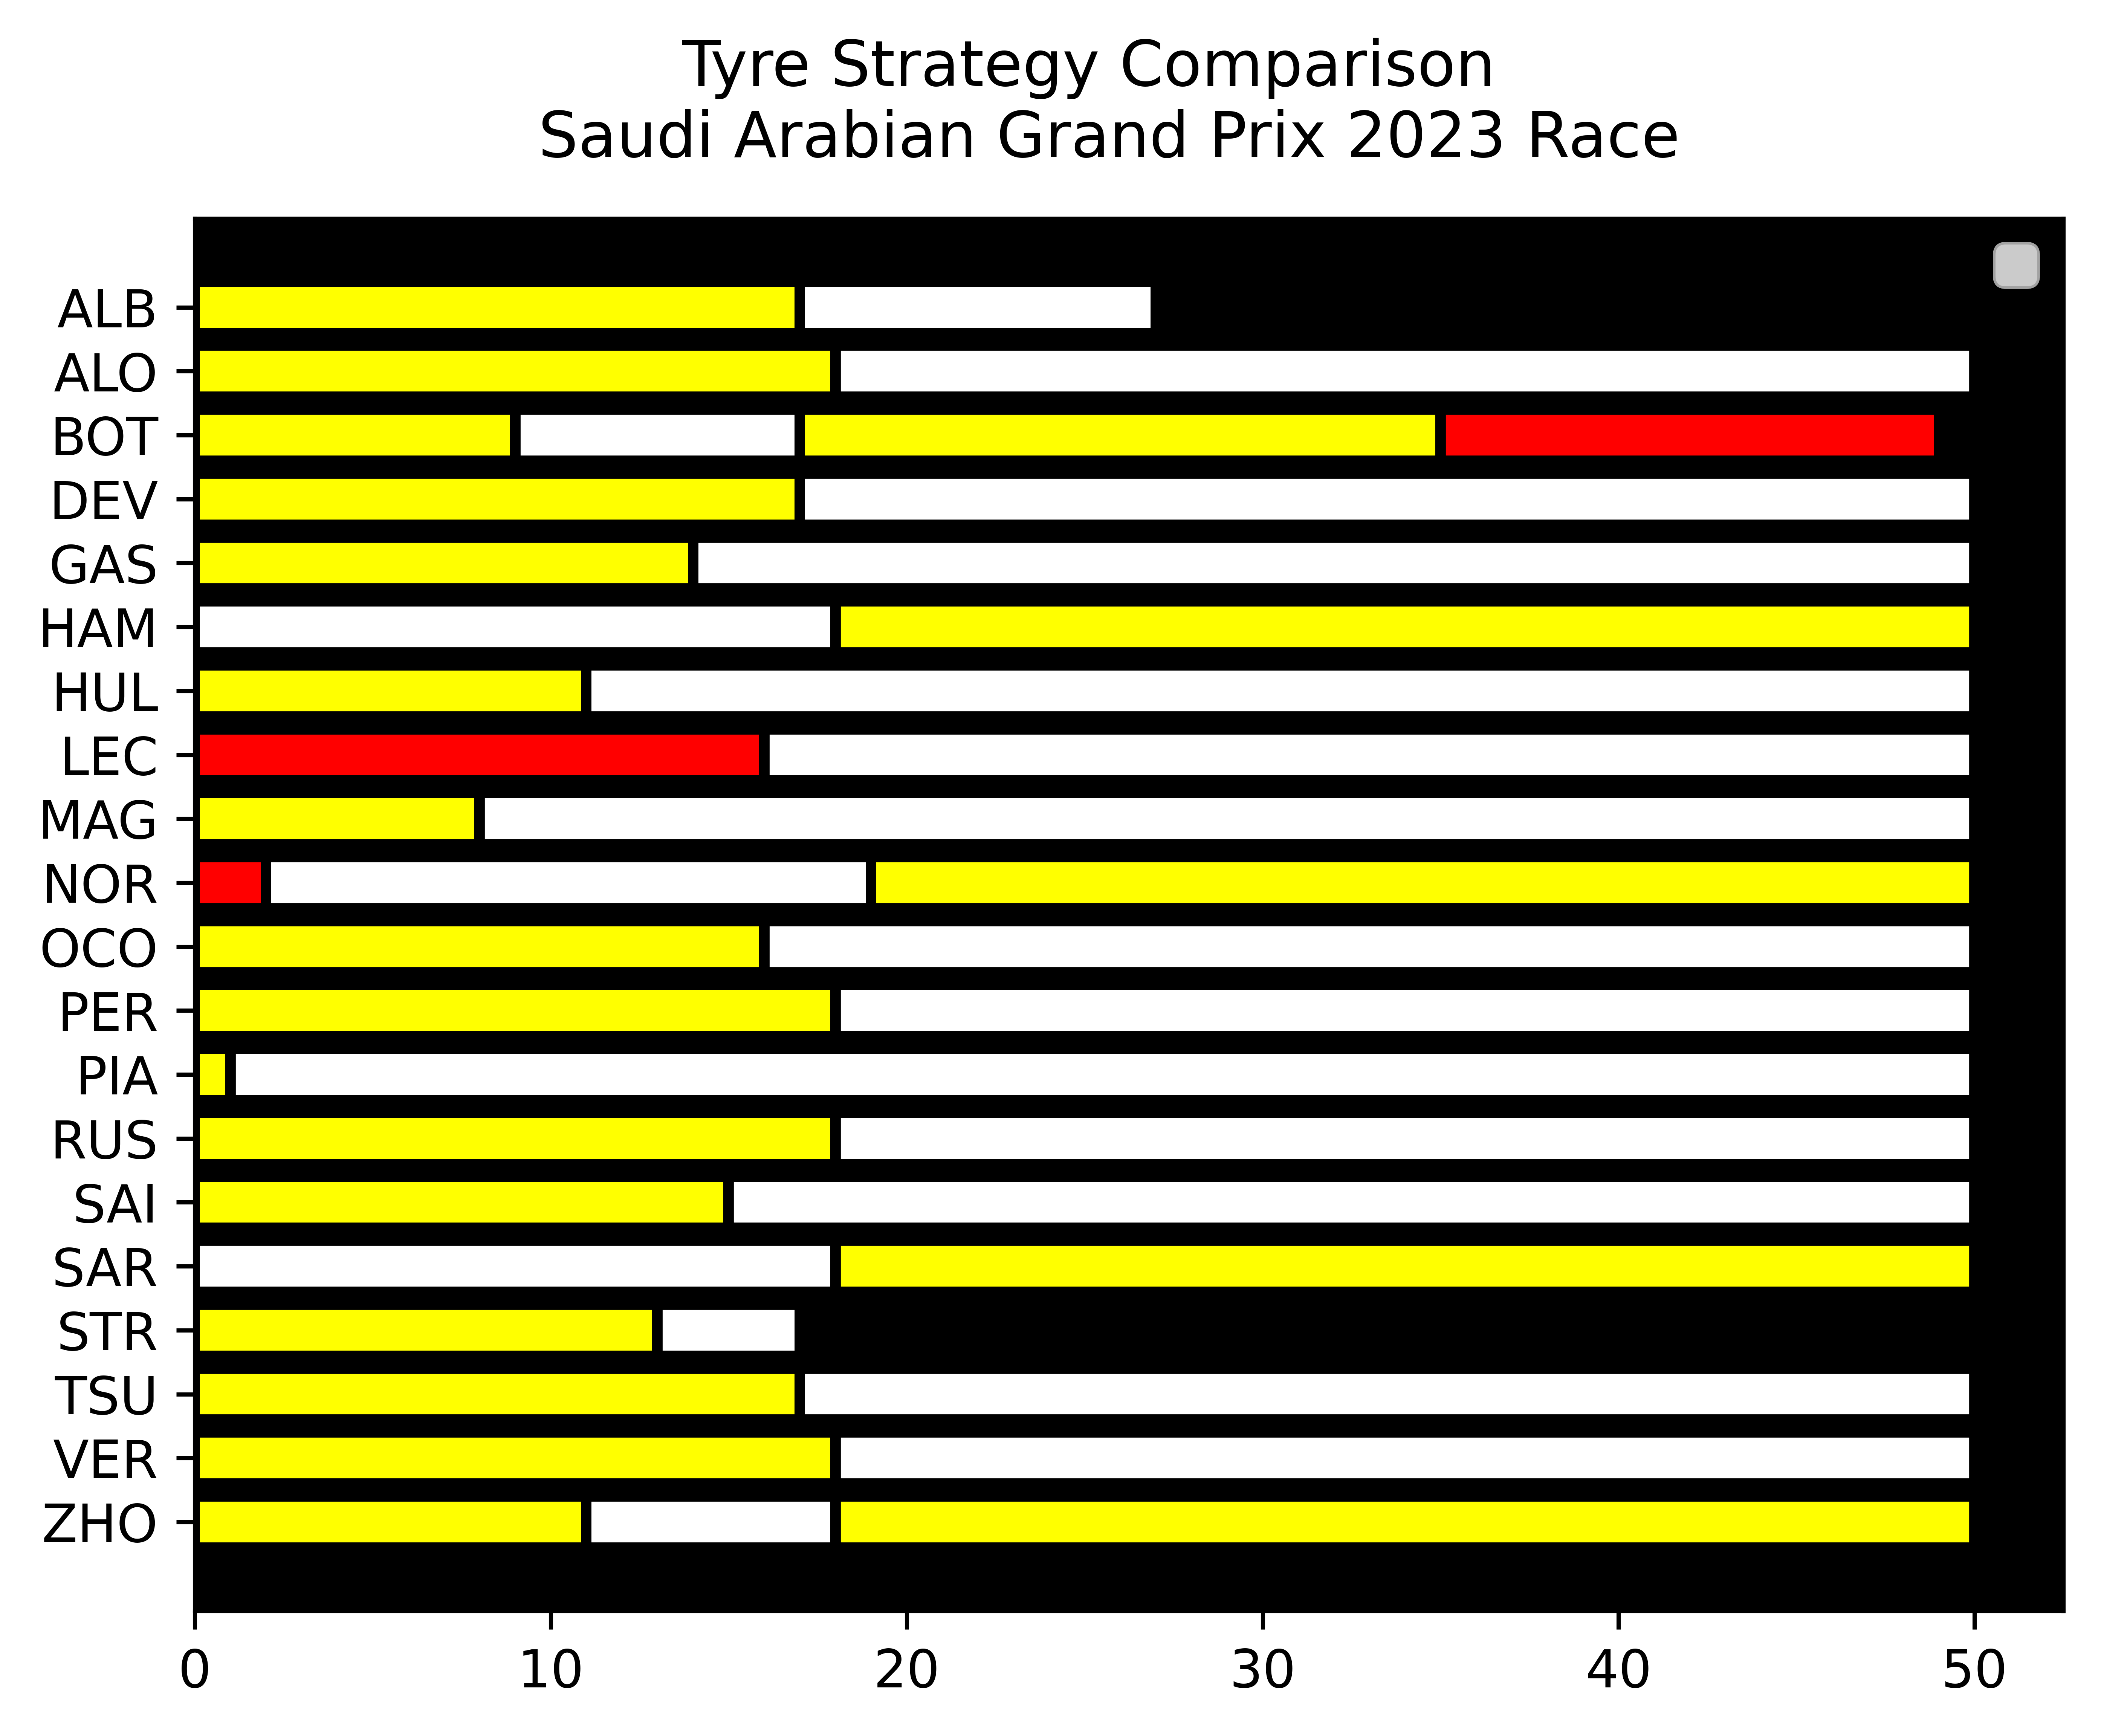

<Figure size 5e+06x5e+07 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

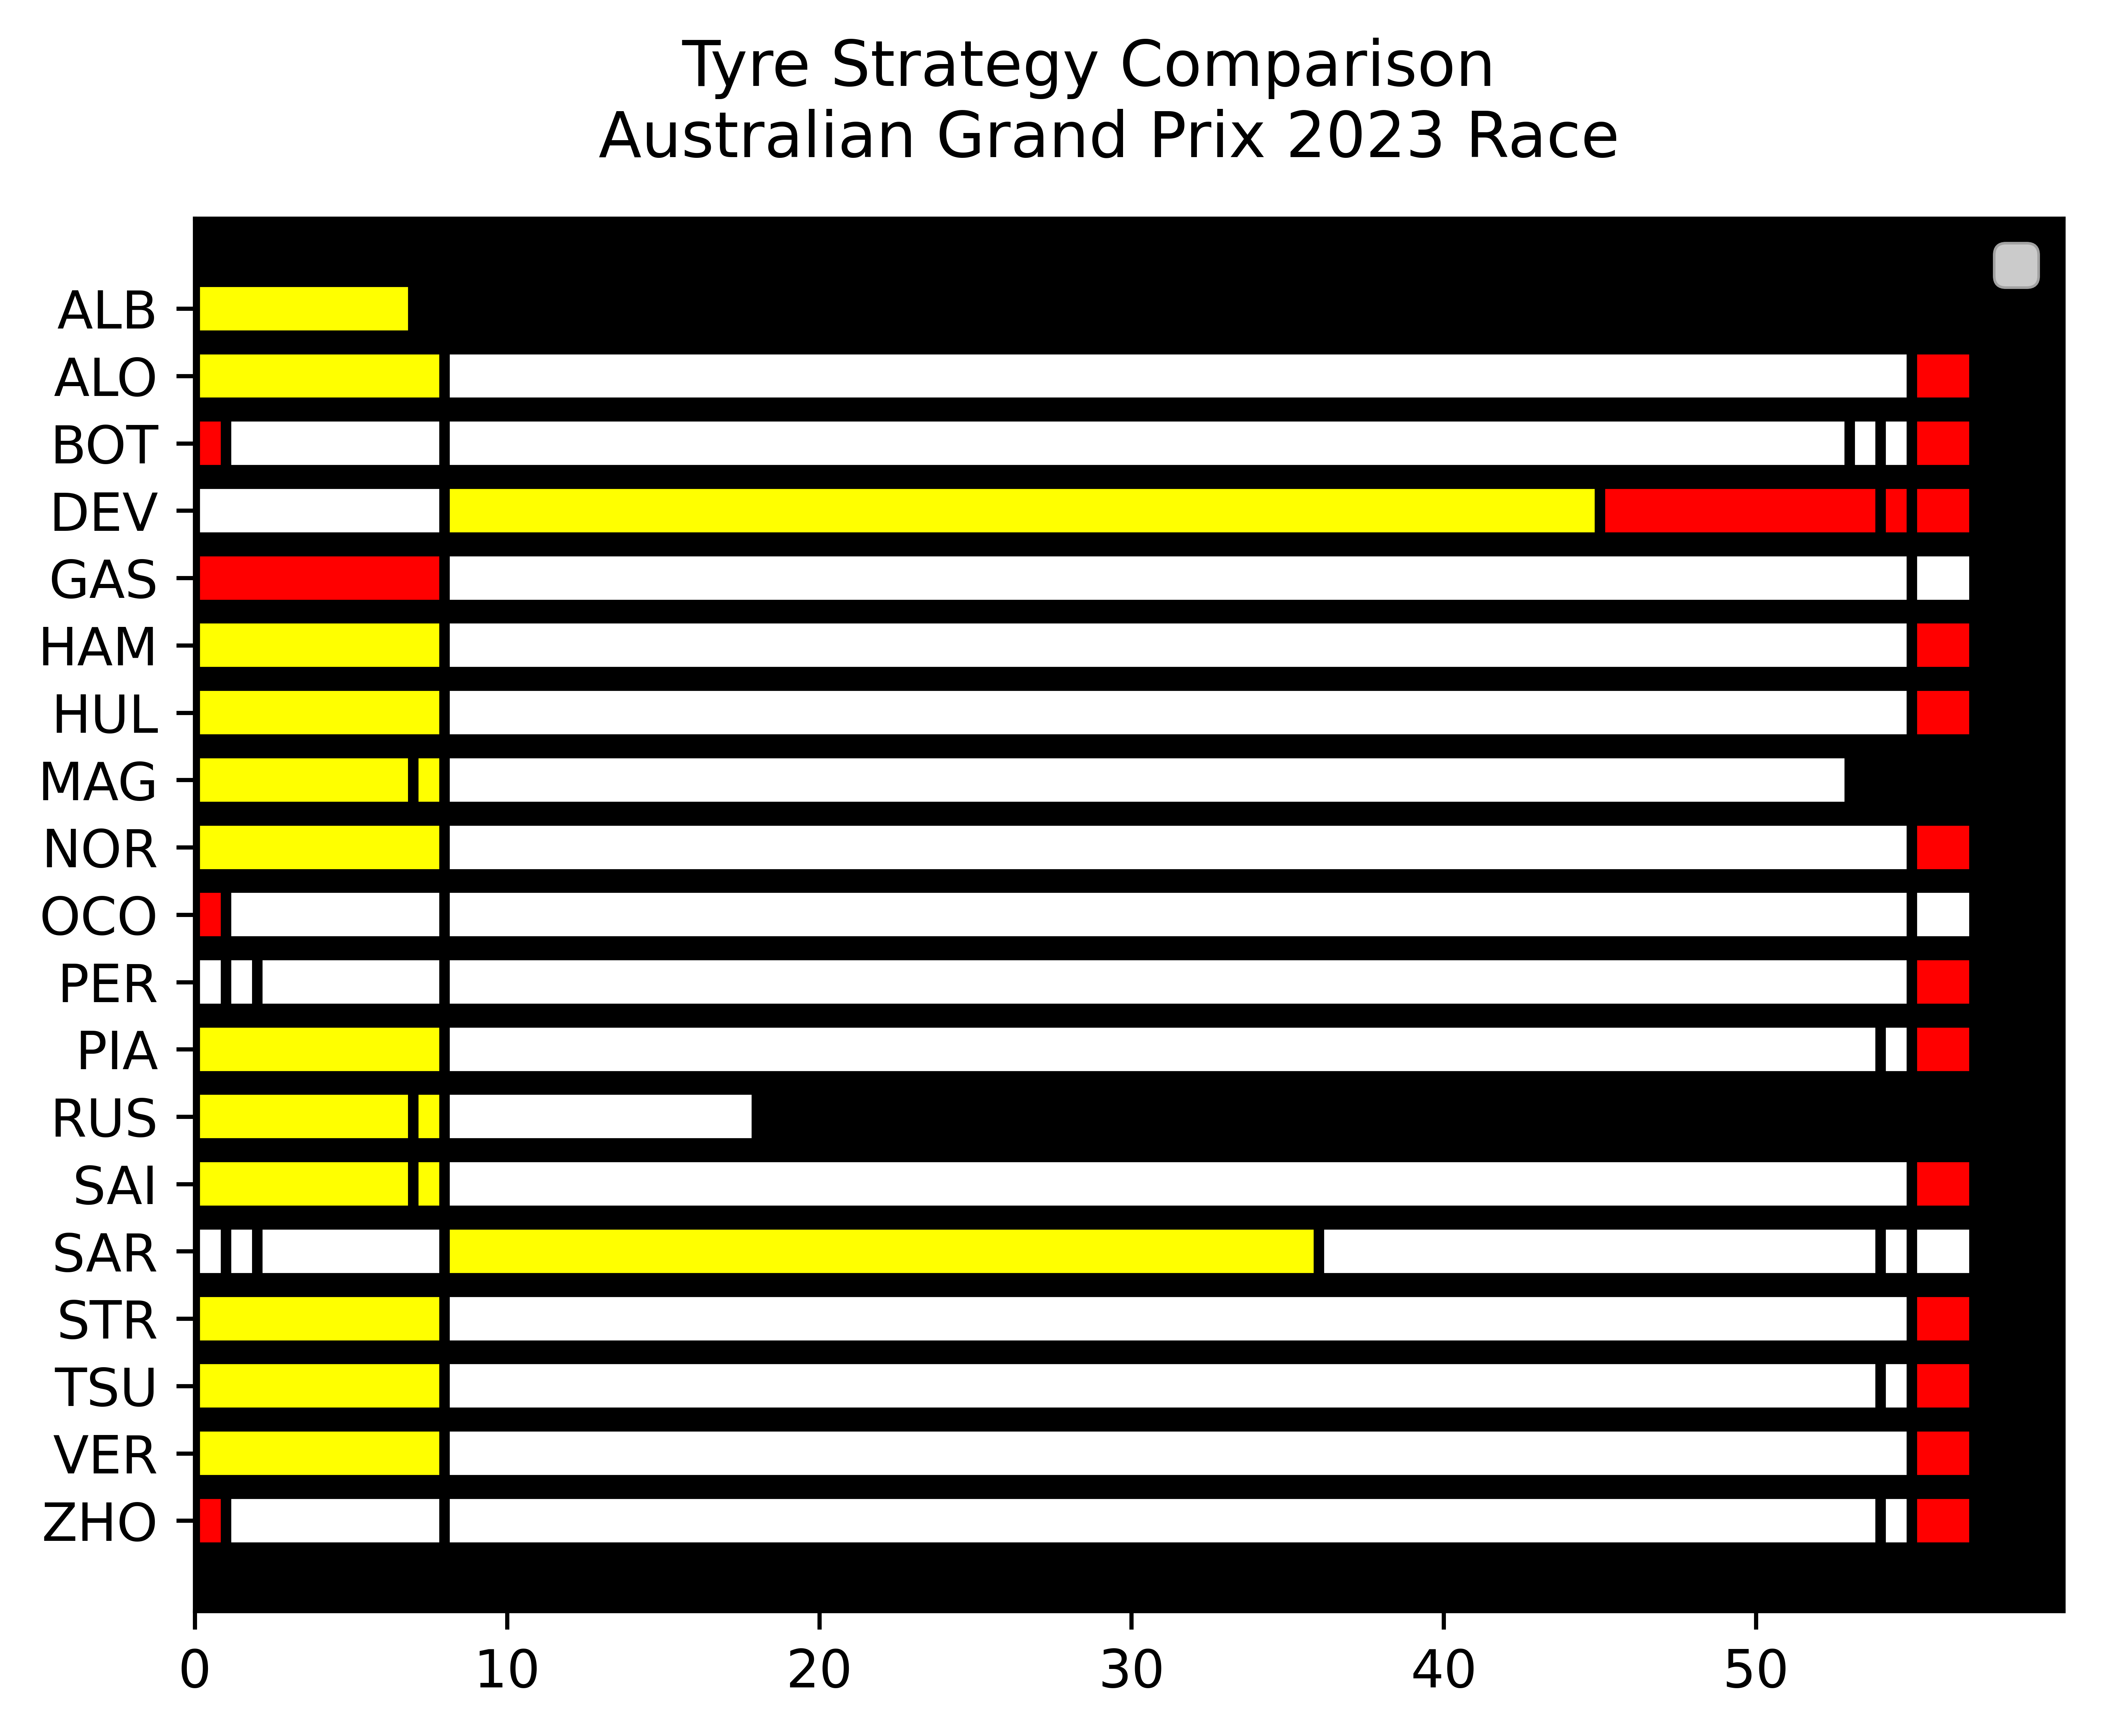

<Figure size 5e+06x5e+07 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

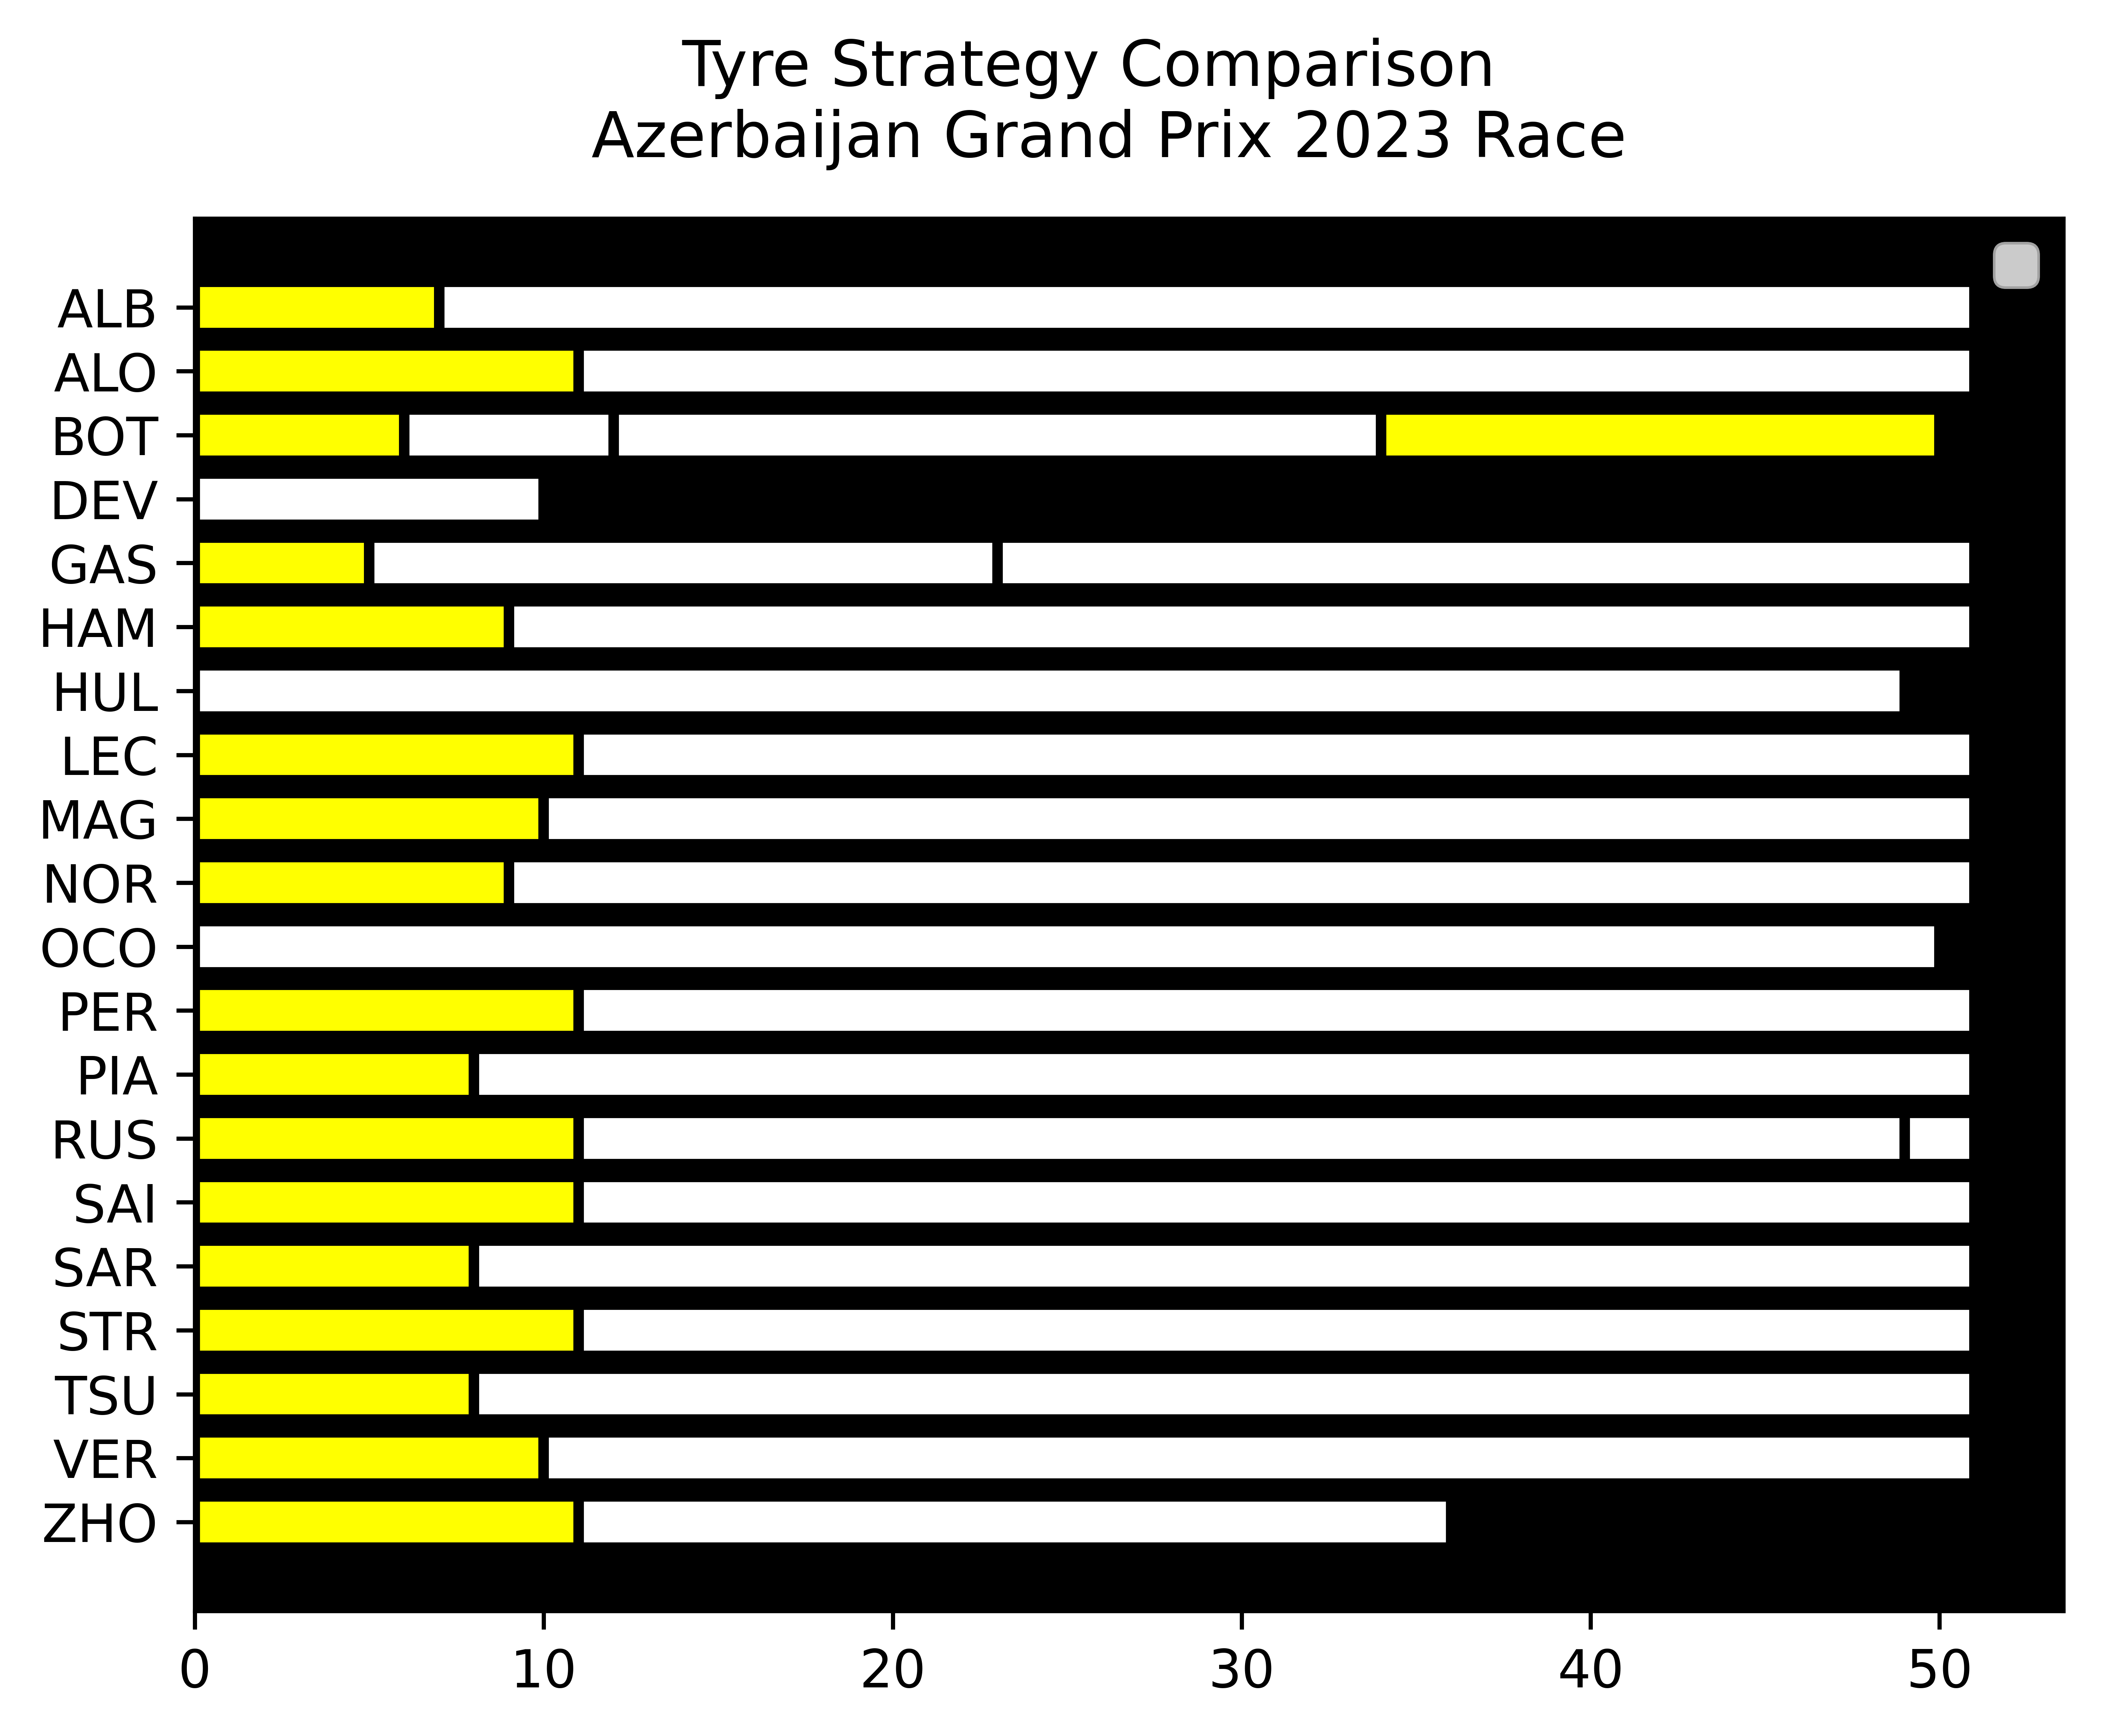

<Figure size 5e+06x5e+07 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

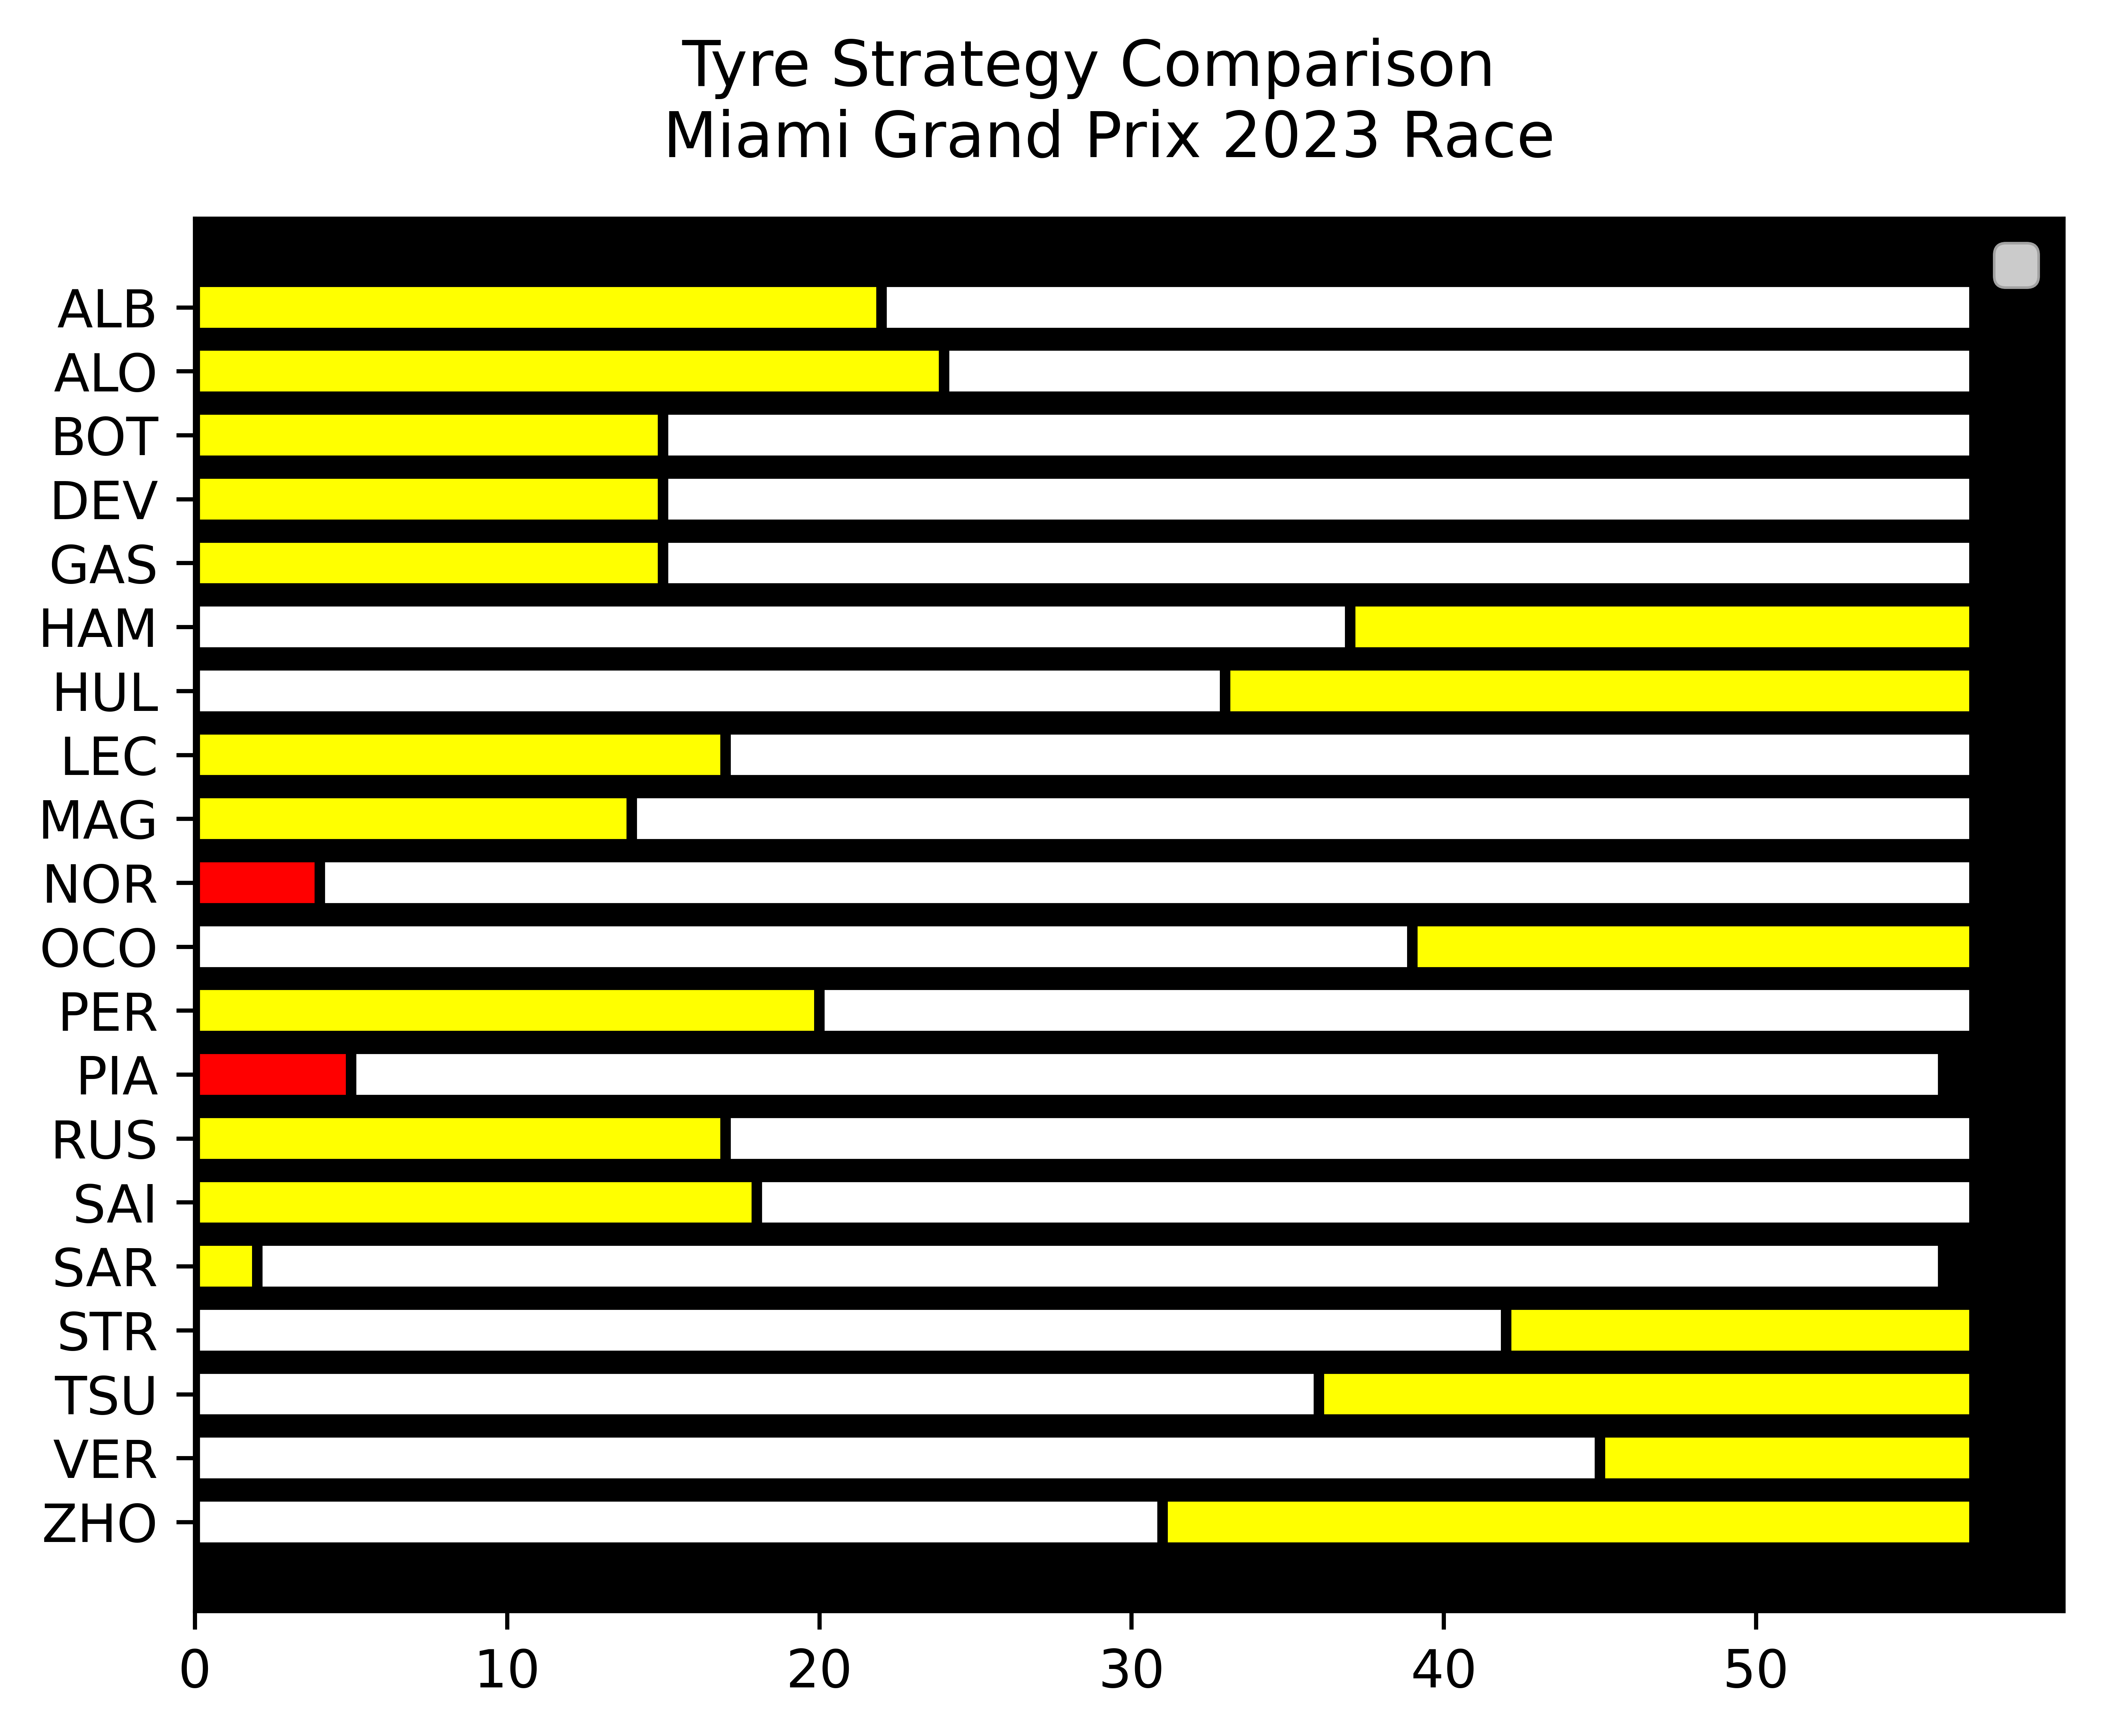

<Figure size 5e+06x5e+07 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

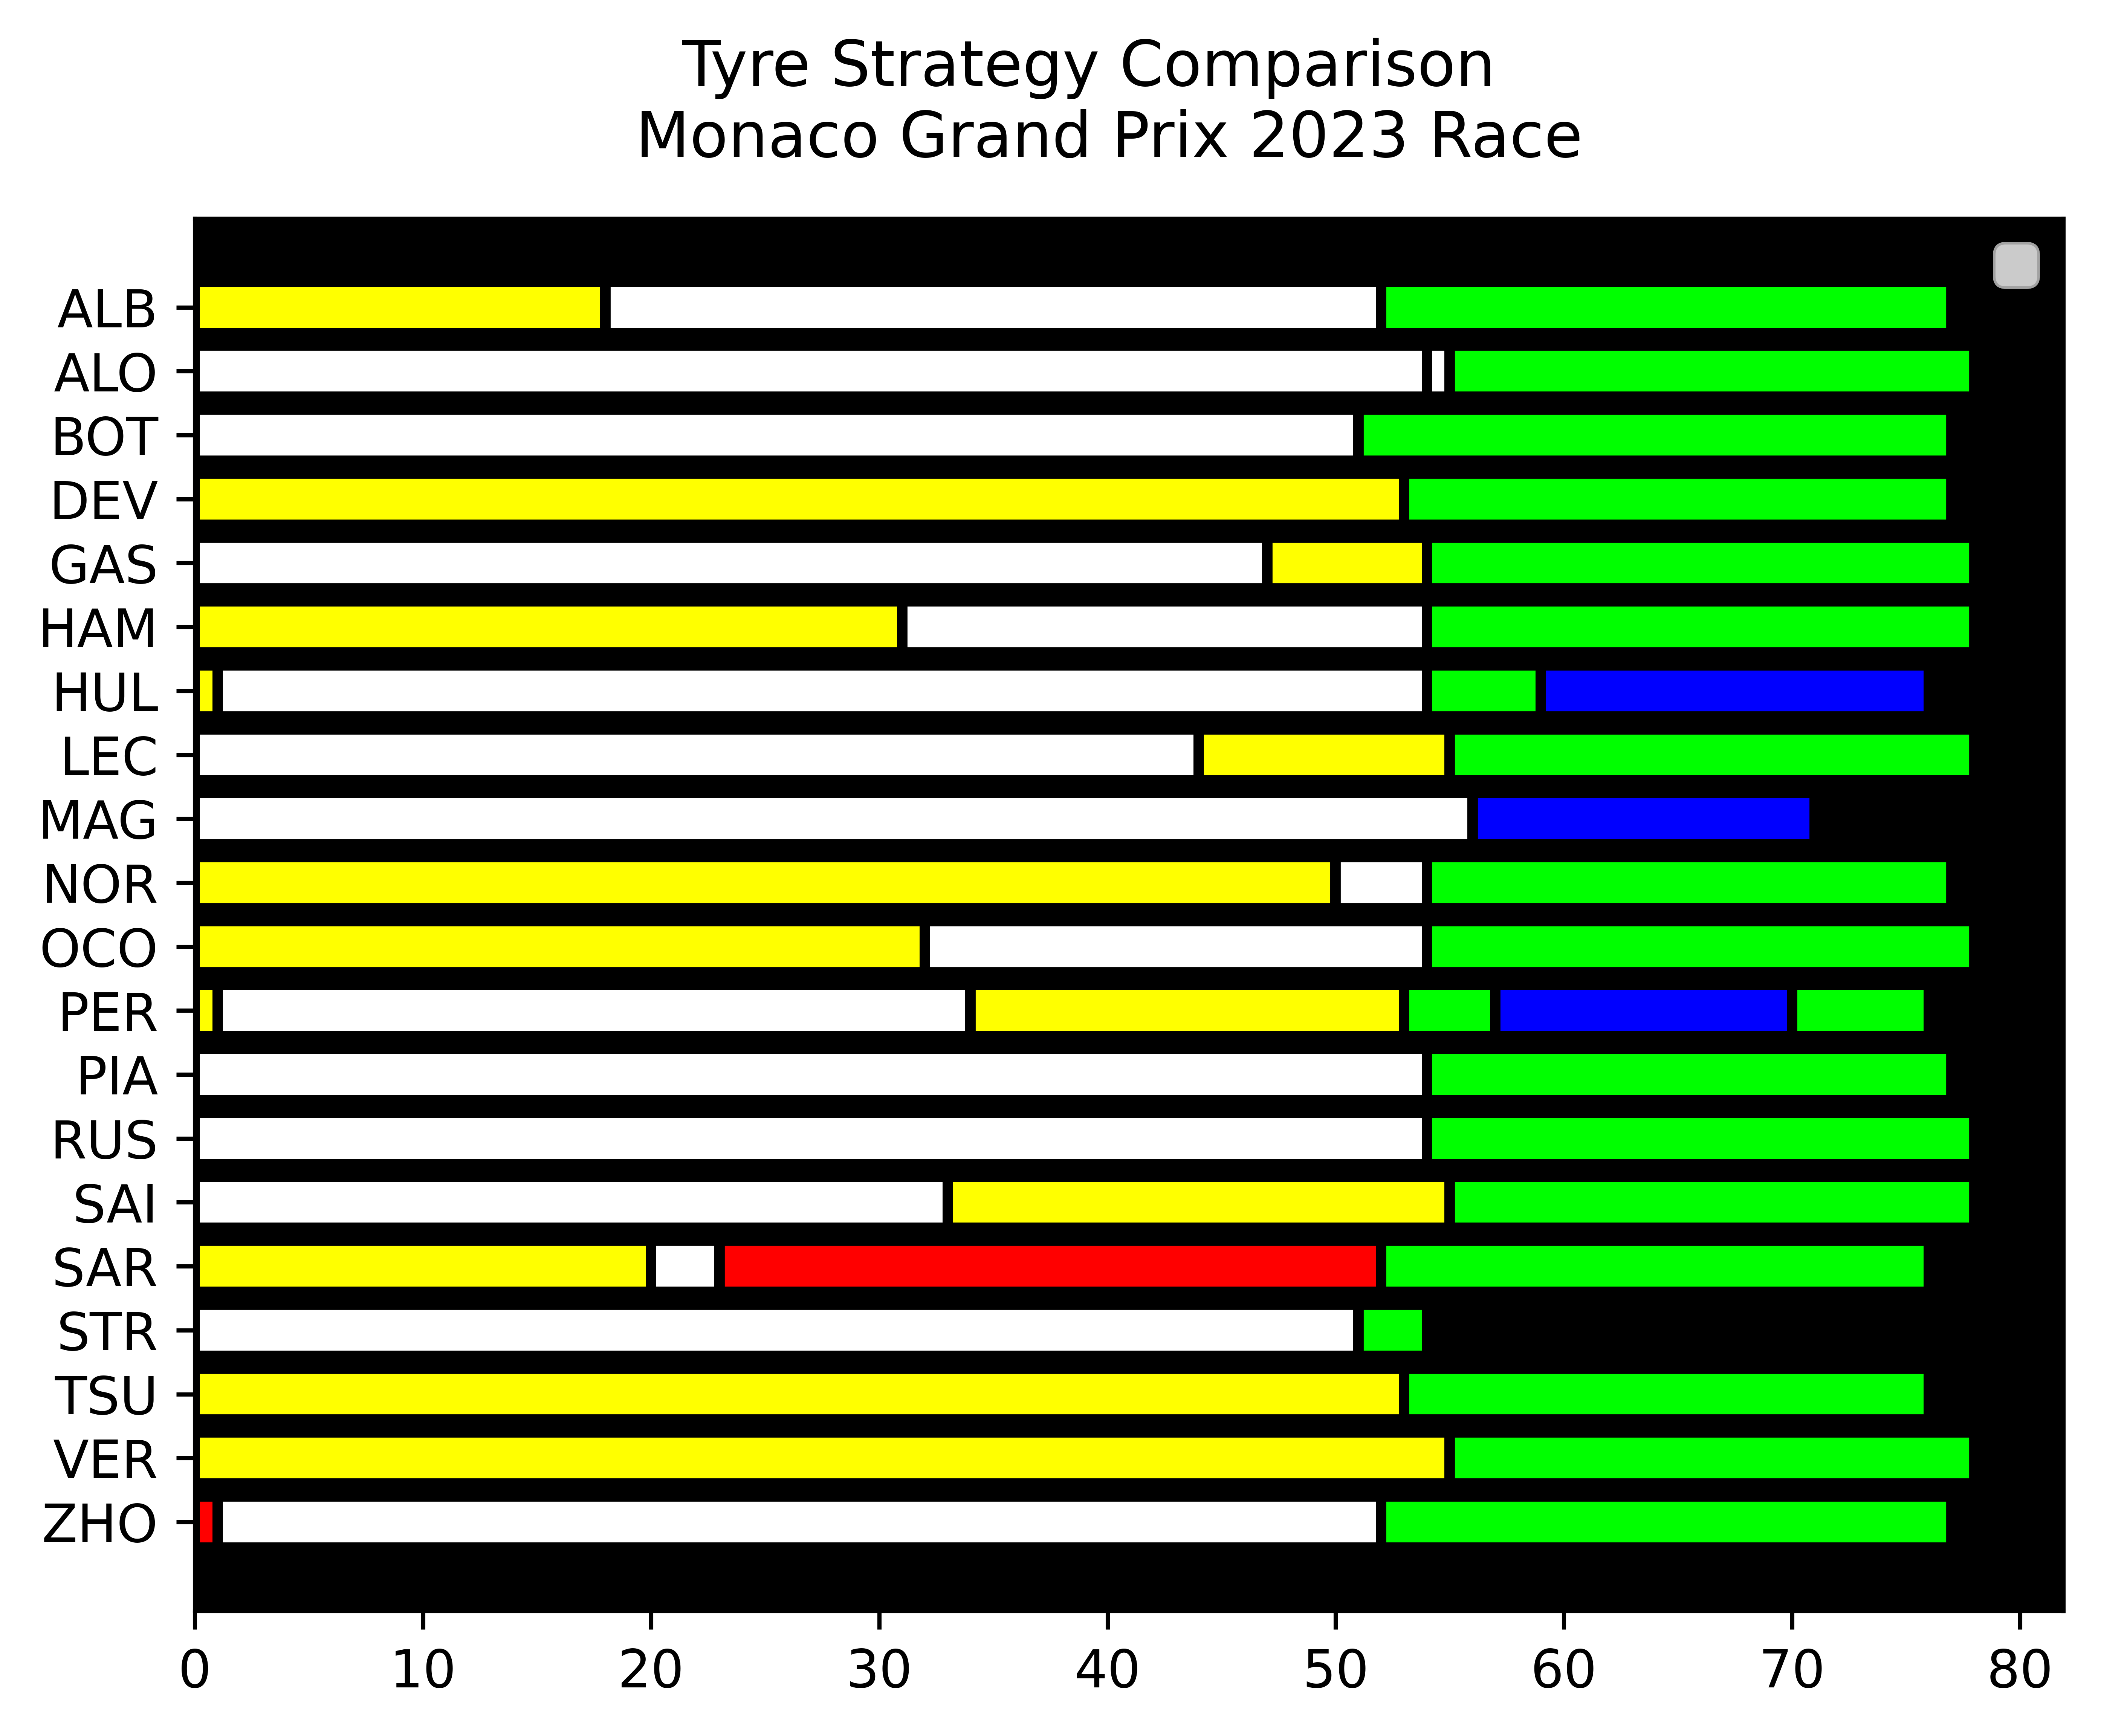

<Figure size 5e+06x5e+07 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

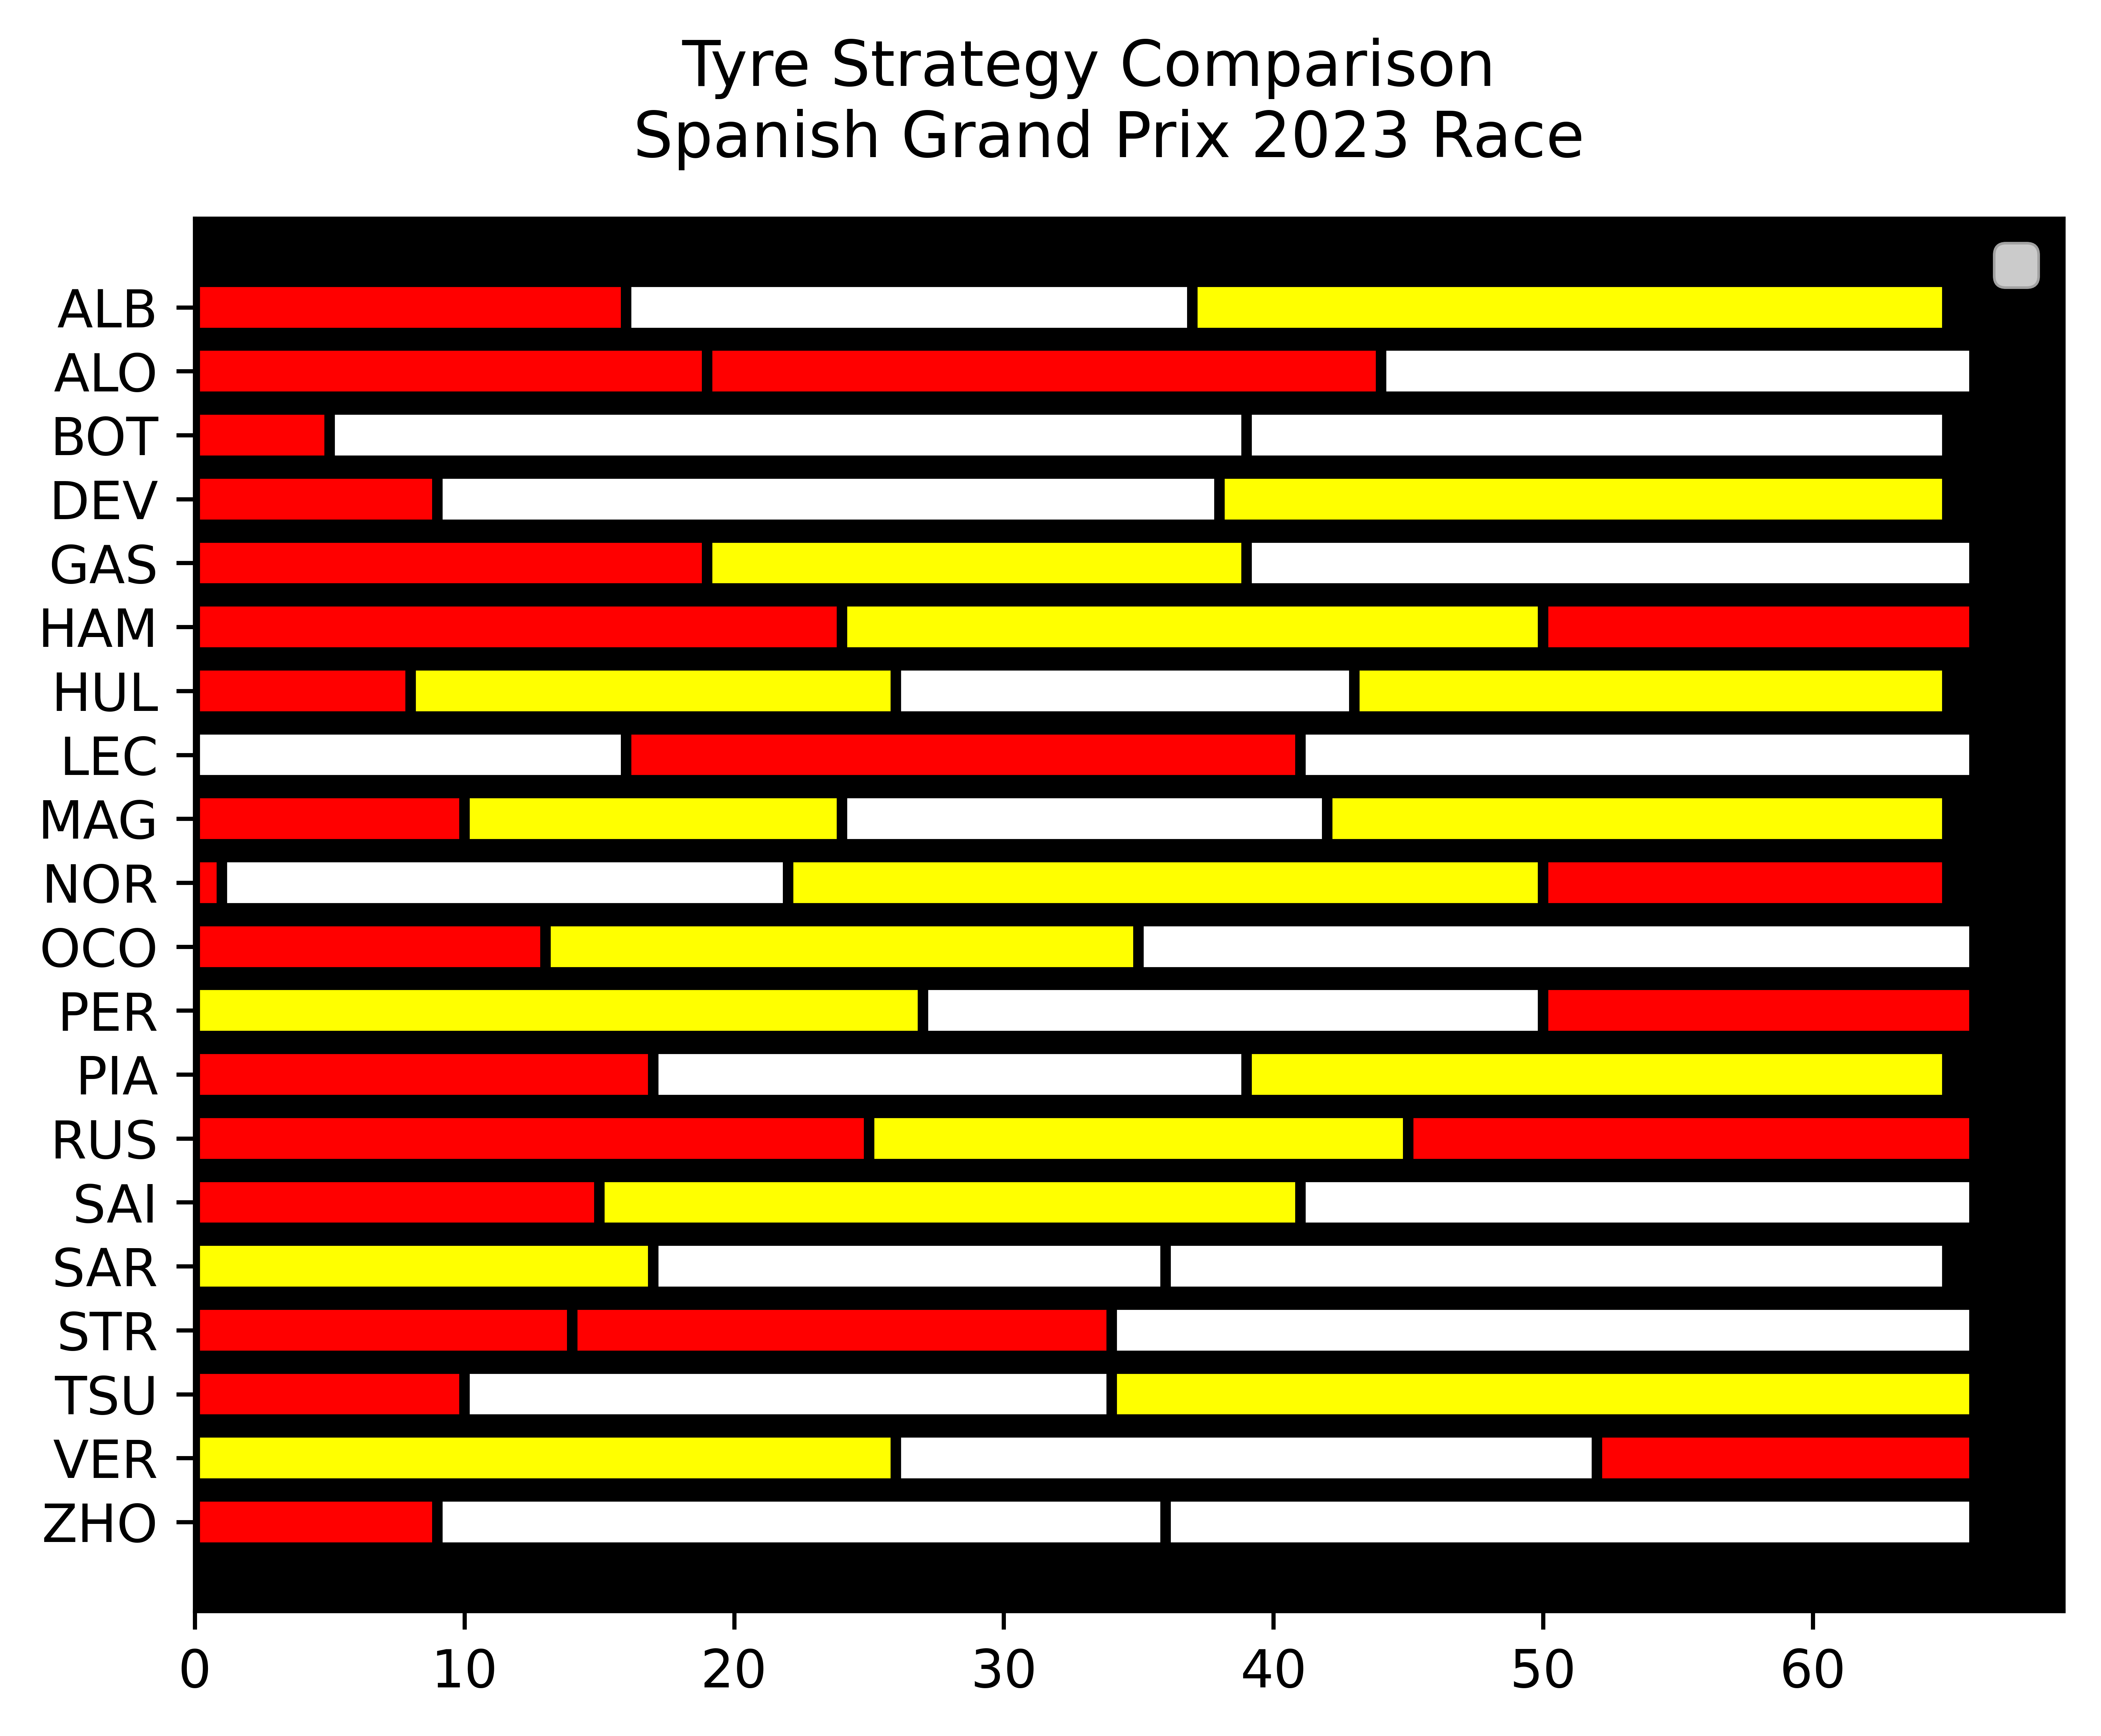

<Figure size 5e+06x5e+07 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

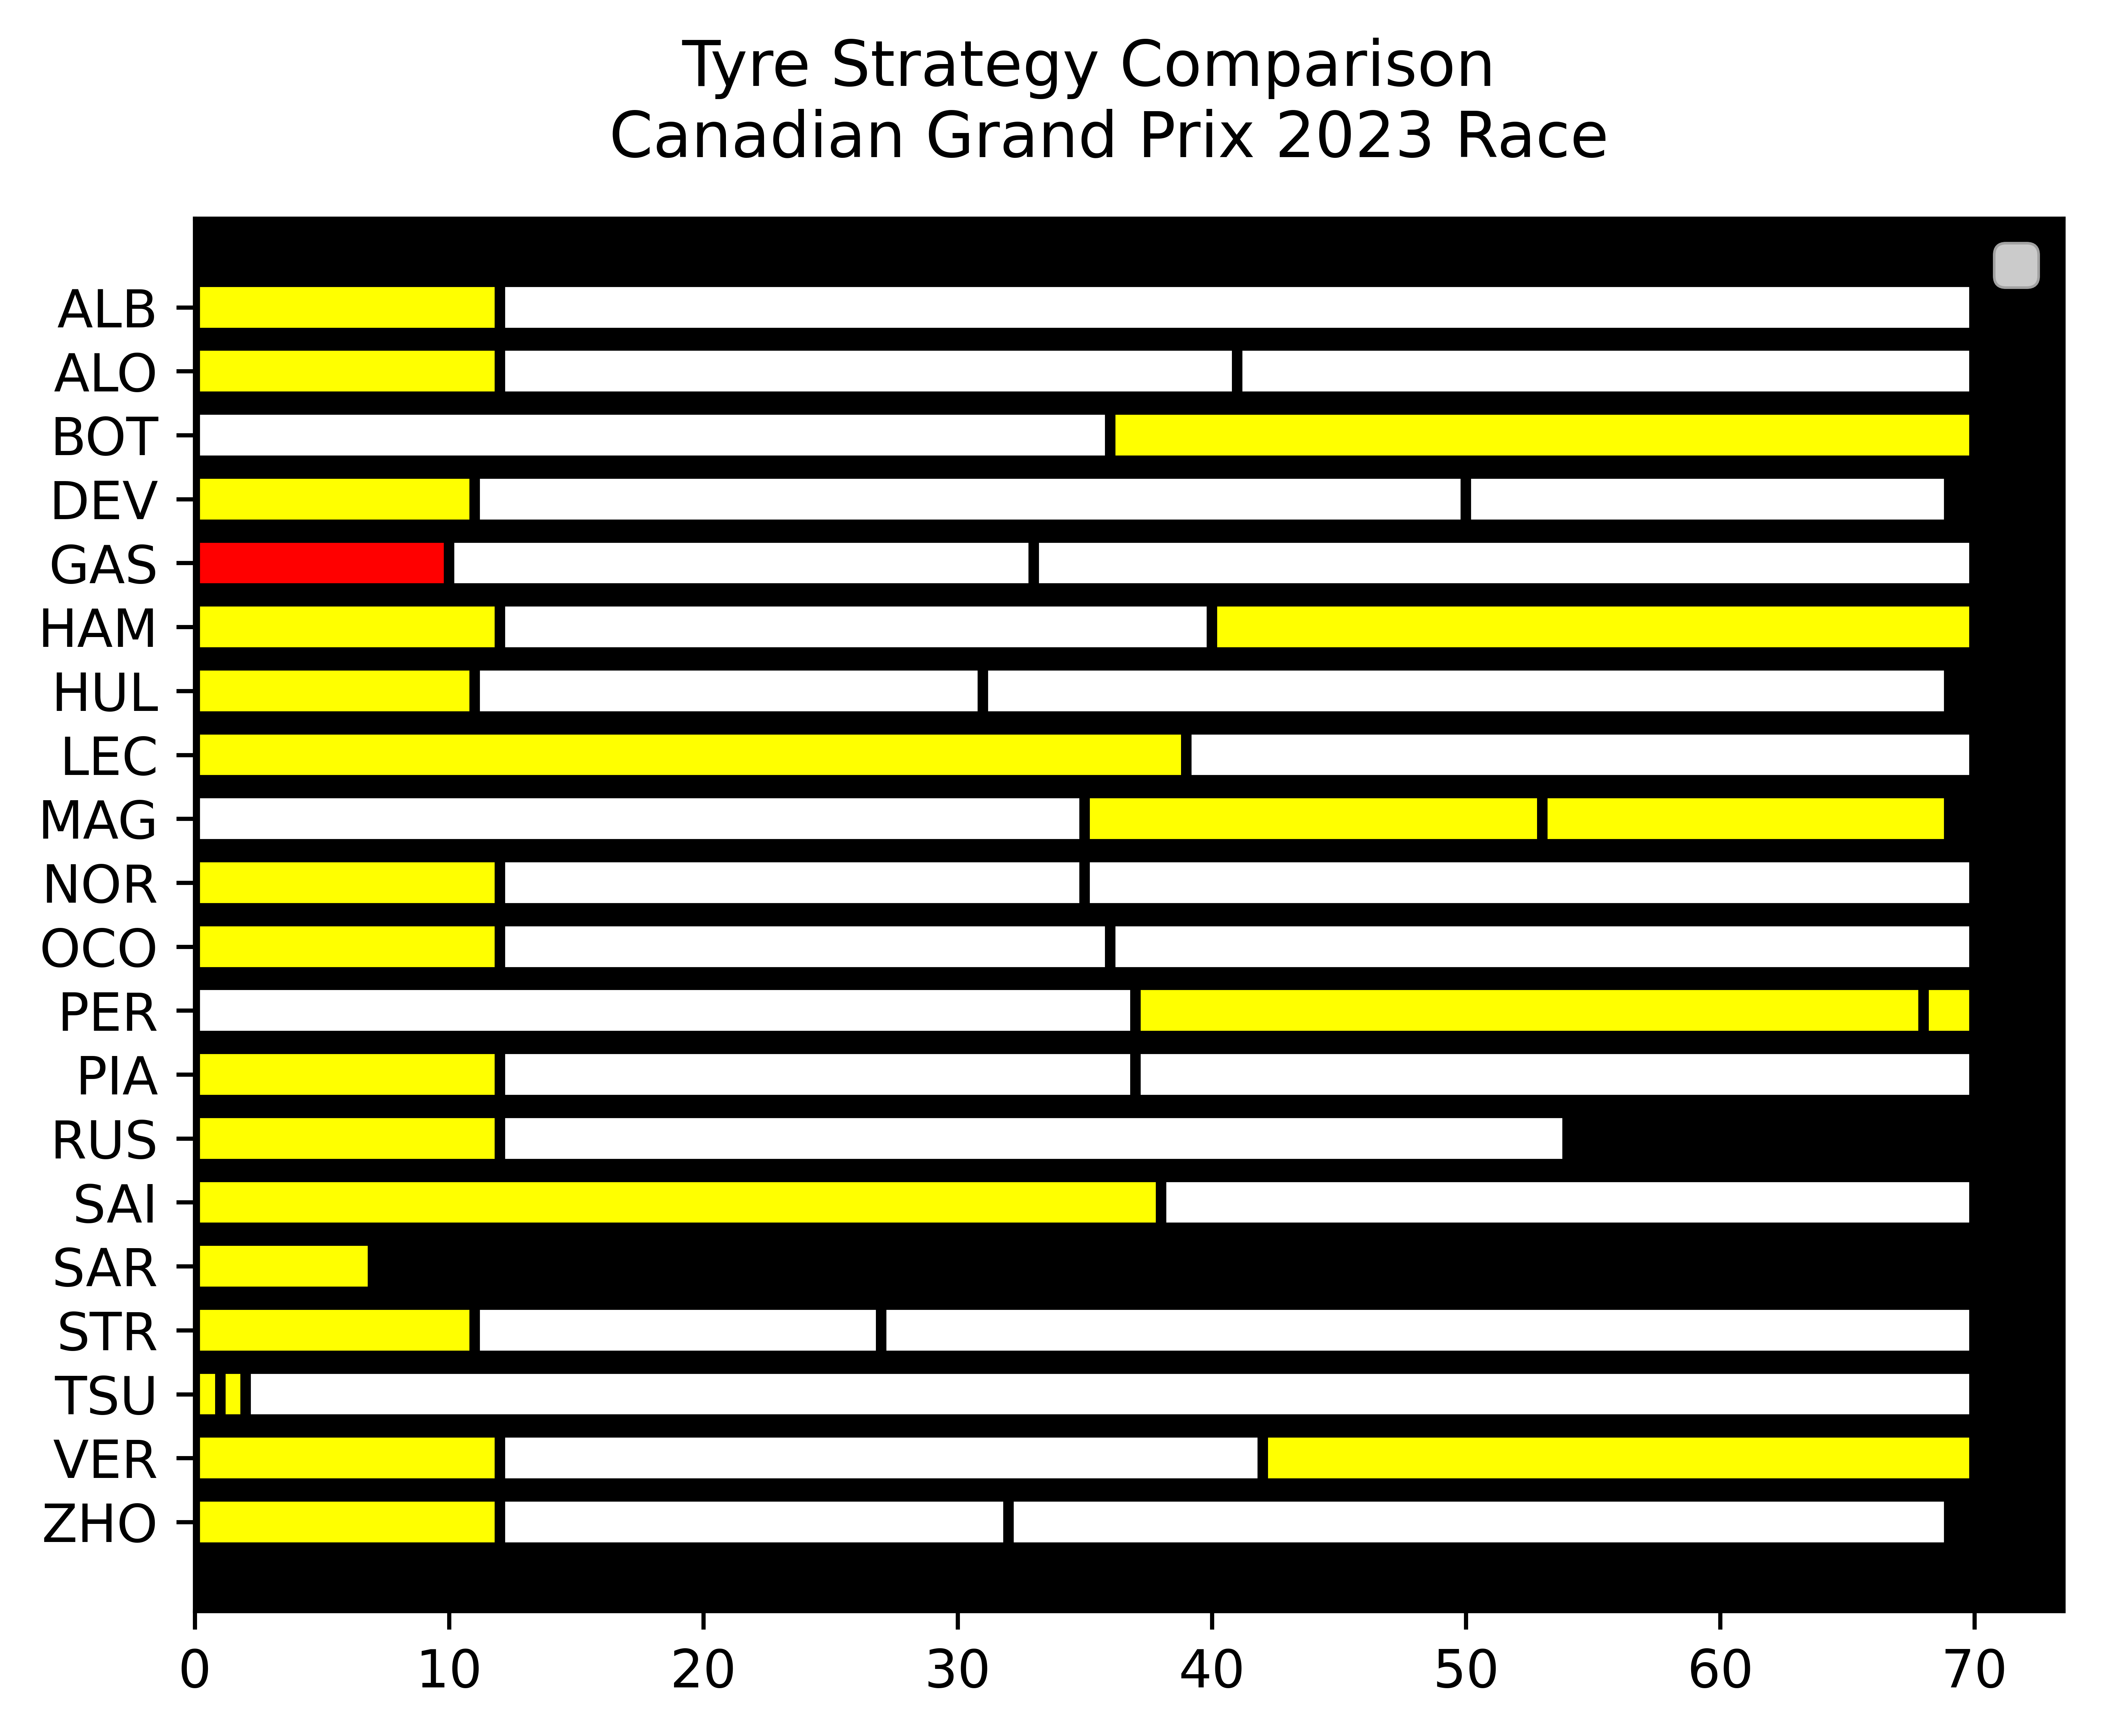

<Figure size 5e+06x5e+07 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

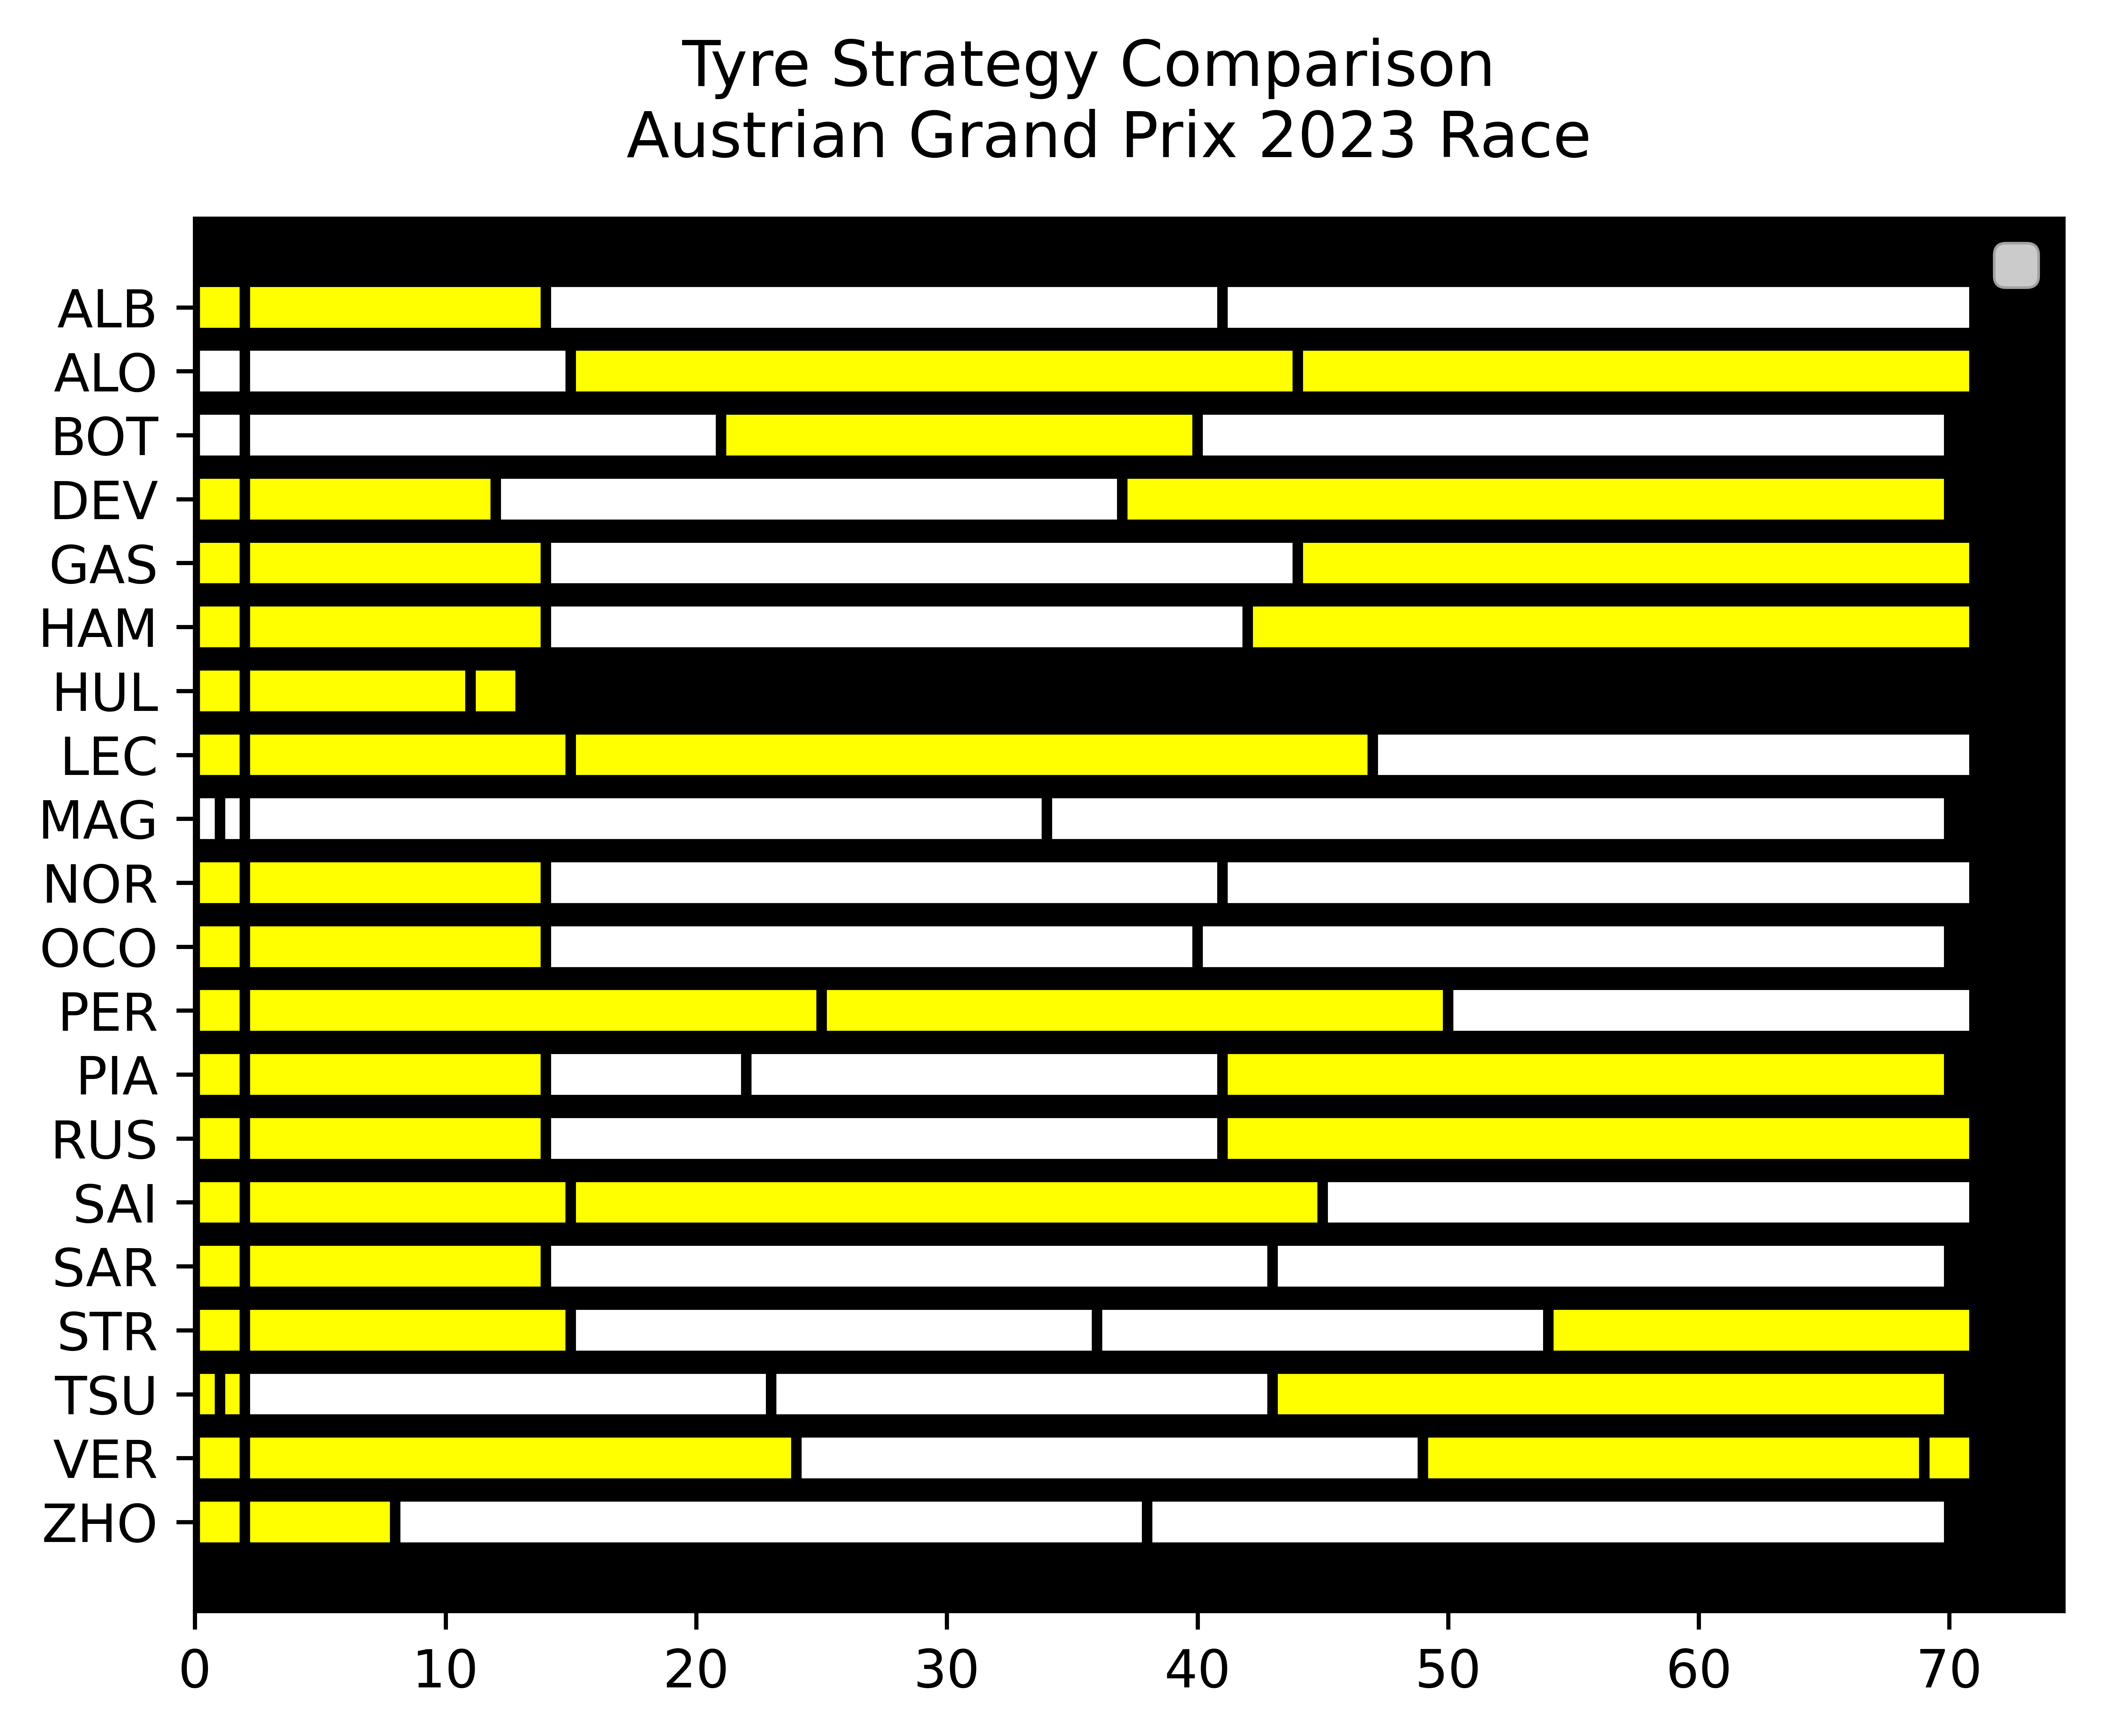

<Figure size 5e+06x5e+07 with 0 Axes>

In [23]:
for session in sessions:
    tyre_strategy_visualization(session, session_name, drivers, compounds)